In [1]:
'''
clustering
    1. K-means clustering algorithm
        here k = means no. of clusters and means = means how many pattern is given in dataset
    2. hierarchical clustering.
        1. Agglomerative H. C. (bottom to top)
        2. Divisive dr
'''

'\nclustering\n    1. K-means clustering algorithm\n        here k = means no. of clusters and means = means how many pattern is given in dataset\n    2. hierarchical clustering.\n        1. Agglomerative H. C. (bottom to top)\n        2. Divisive dr\n'

In [2]:
#importing basic library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#checking null values 
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#checking data types
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
#creating new data frame which hold annual income and spending score 
df_new=df[['Annual Income (k$)','Spending Score (1-100)']]
#or we can do
#df_new=df.iloc[:,3:]

In [7]:
df_new.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
#appyling scalling on df_new to make in same unit 
from sklearn.preprocessing import StandardScaler

In [9]:
#creating object of Standardscaler class
ss=StandardScaler()
x=ss.fit_transform(df_new)
print(type(x))
print(type(df_new))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
df_new.shape

(200, 2)

In [11]:
#using dendrogram method to find the optimal number of clusters in given dataset
#with the help of income and spend

#dendrogram function is in 
#scipy - package (scientific python) -> cluster (outer class)  ->  Hierarchy class (inner class) -> Dendrogram class  -> dendrogram()
#so we have to first install scipy for first time in symtem

#!pip install scipy

In [12]:
import scipy.cluster.hierarchy as sch

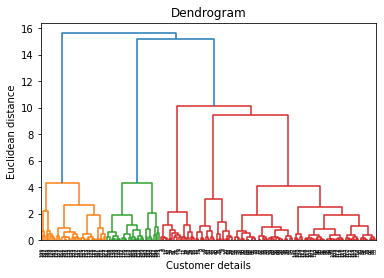

In [13]:
dendro=sch.dendrogram(sch.linkage(x,method='ward'))  #here ward is method like euclidean distance
#dendro is user define object
plt.title("Dendrogram")
plt.xlabel("Customer details")
plt.ylabel("Euclidean distance")
plt.show()

In [14]:
#here if we draw dendrogram line just above the maximum length of cluster 
#we will get K = 5


In [15]:
#performing model with the help of Agglomerative Hierarchical clustering 
#to give the cluster to each row in given data set 
#use in-built class AgglomerativeClustering 
from sklearn.cluster import AgglomerativeClustering

In [16]:
#creating object of AgglomerativeClustering class
ac = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [17]:
#training the model and alloting category of each row 
#ussing inbuilt method fit_predict() of agglomerativeclustering class
Y_pred = ac.fit_predict(x)  #here x is input which holds income and spend

In [18]:
Y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [19]:
#adding new column in df_new 
df_new['Target']=Y_pred
df_new.head()

,Annual Income (k$),Spending Score (1-100),Target
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [20]:
ss=StandardScaler()
df_new['Annual Income (k$)']=ss.fit_transform(df_new[['Annual Income (k$)']])
df_new['Spending Score (1-100)']=ss.fit_transform(df_new[['Spending Score (1-100)']])

In [21]:
df_new.head()

,Annual Income (k$),Spending Score (1-100),Target
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4


In [22]:
df0=df_new[df_new['Target']==0]
df1=df_new[df_new['Target']==1]
df2=df_new[df_new['Target']==2]
df3=df_new[df_new['Target']==3]
df4=df_new[df_new['Target']==4]

In [23]:
df0.shape,df1.shape,df2.shape,df3.shape,df4.shape
    

((32, 3), (39, 3), (85, 3), (21, 3), (23, 3))

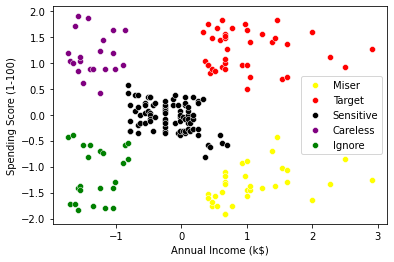

In [25]:
#visualizing all the clusters
sb.scatterplot(data=df0,x='Annual Income (k$)',y='Spending Score (1-100)',color='yellow',label='Miser')
sb.scatterplot(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)',color='red',label='Target')
sb.scatterplot(data=df2,x='Annual Income (k$)',y='Spending Score (1-100)',color='black',label='Sensitive')
sb.scatterplot(data=df3,x='Annual Income (k$)',y='Spending Score (1-100)',color='purple',label='Careless')
sb.scatterplot(data=df4,x='Annual Income (k$)',y='Spending Score (1-100)',color='green',label='Ignore')
plt.show()